In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [9]:
iris.groupby('species').describe()['sepal_length']

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [13]:
#here we have 3 classes ->1)setosa 2)versicolor & 3)virginica
#here look at min & max -> 
#1)setosa -> 4.3 to 5.8 
#2)versicolor -> 4.9 to 7.0 -> there is overlapping -> we clearly cannot divide only by "sepal_length" column

In [14]:
iris.groupby('species').describe()['sepal_width']

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,3.428,0.379064,2.3,3.200,3.4,3.675,4.4
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [32]:
#sepal_width is also overlapping for min and max values between 3 classes
#SO IT IS LITTLE BIT DIFFICULT HOW TO SEE IT VISUALLY-> now let us consider 2 features -> which combination do we have to take 
#Lets consider all combinations and visualize 
#Here we have 4 features and 3 classes 

In [21]:
#so how do we have to see 
# sepal_length vs sepal_width
# sepal_length vs petal_length
# sepal_length vs petal_width
# sepal_width vs petal_length
# sepal_width vs petal_width
# petal_length vs petal_width
# 4 C 2 = 6 combinations


# columns => sepal_length	sepal_width	petal_length	petal_width

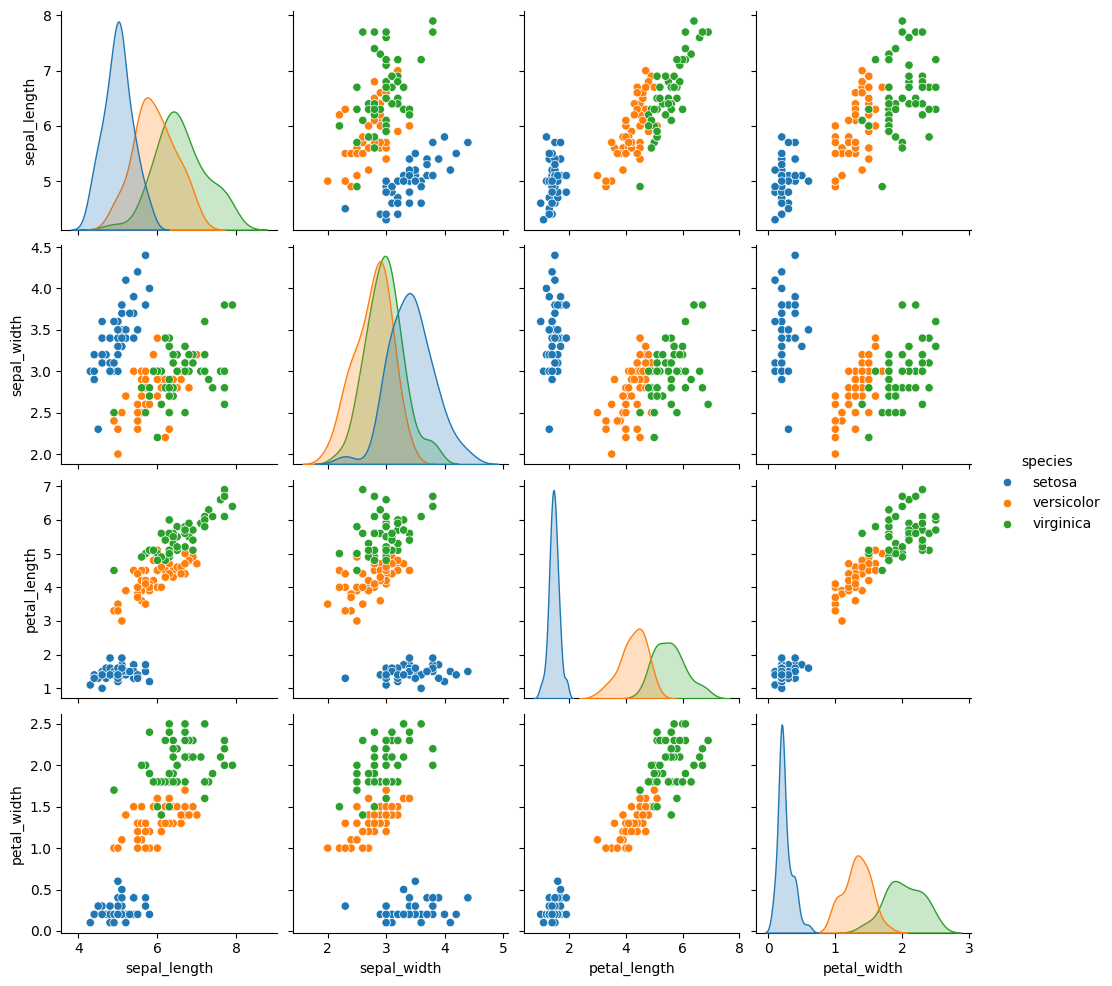

In [26]:
#SCATTER PLOT MATRIX -> PAIRPLOT() in seaborn gives the visual display of plots between all the columns 
sns.pairplot(iris,hue='species')

#if no.of features are more it will take a lot of time 


#seaborn is also developed on mathplotlib 

In [27]:
# versicolor & virginica's are difficult to separate 
# setosa can be easily separated
# there are 6 unique combinations in the above graph which are repeated twice, diagonally they are same

In [28]:
#petal_width Vs petal_length looks to be a good separation

In [29]:
#so choosing petal_width & petal_lenght as features

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text

In [36]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
X = iris[['petal_length','petal_width']]
y = iris['species']

In [41]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [42]:
model.get_depth(),model.get_n_leaves()

(5, 8)

In [47]:
model.feature_names_in_  , model.classes_

(array(['petal_length', 'petal_width'], dtype=object),
 array(['setosa', 'versicolor', 'virginica'], dtype=object))

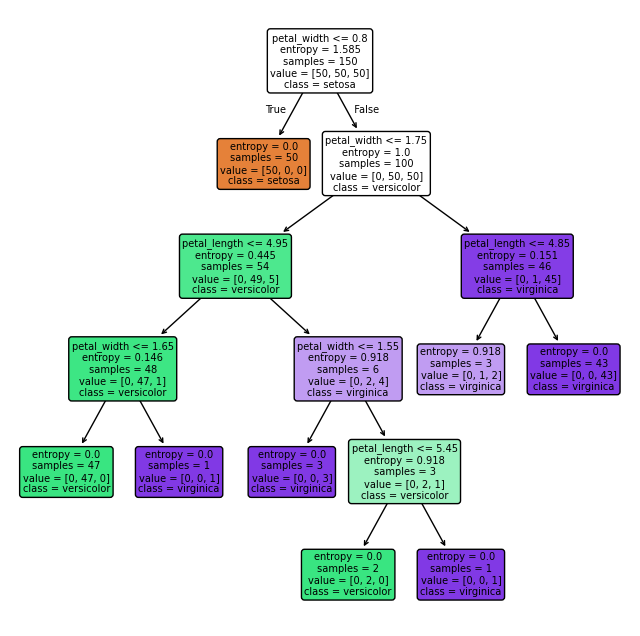

In [49]:
plt.figure(figsize=[8,8])
plot_tree(model,
          feature_names=model.feature_names_in_,
          class_names=model.classes_,
          filled = True,
          rounded = True
         )
plt.show()